# Clasificación de vinos

En esta prácitca vamos a intentar clasificar vinos dependiendo sus características químicas.

Para esta práctica usaremos la *wine_dataset* incluida en la librería **Sklearn**. A diferencia de las prácticas anteriores, la base de datos se va a descargar desde la nube.

Comenzaremos cargando las librerías necesarias.

In [ ]:
import numpy as np # Librería para el cálculo numérico
import pandas as pd # Librería para manejar las bases de datos
import matplotlib.pyplot as plt # Librería para realizar gráficas
from tensorflow import keras # Librerías para machine learning
from tensorflow.keras.layers import Dense # Capas de red neuronal normales
from tensorflow.keras.models import Sequential # Modelo secuencial, ie, el modelo de red normal
from tensorflow.keras.utils import plot_model # Librería para gráficar la arquitectura de red
from sklearn.datasets import load_wine # Con esta librería vamos a cargar la base de datos desde Sklearn
from sklearn.preprocessing import MinMaxScaler # Librería para escalar los valores de la dataset
from sklearn.model_selection import train_test_split # Librería para crear los conjuntos de entrenamiento y prueba

## Cargando la base de datos

In [ ]:
dataset = load_wine()

En la variable *dataset* se va a cargar la base de datos completa. A diferencia de cuando usamos un archivo .csv, en este caso, la dataset será un objeto y no un archivo.

Al ser objeto, tiene varias características interesantes.

In [ ]:
dataset

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

Podrán observar que la estructura es parecido al de un archivo *.csv*, sin embargo, no podemos asignar estos valores directamente a un DataFrame de Pandas tan facil

In [ ]:
### Convertimos los datos en un dataframe de Pandas para facilitar su entendimiento
wines = pd.DataFrame(dataset.data,columns=dataset.feature_names)
wines['Class'] = dataset.target

wines.head(-1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0,2
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2


La variable *wines* será un DataFrame de Pandas. Para crearlo debemos indicar que usaremos los datos del objeto *dataset*. Después debemos indicar el nombre que tendrán las columnas, esto con la instrucción *columns* e indicando que los nombres serán los nombres de las variables. Por último, debemos crear una columna adicional llamada *Class* donde usaremos los *targets* (valores objetivo) del objeto *dataset*.

In [ ]:
### Una descripción estadística de la base de datos
wines.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Revisando rápidamente los datos podemos observar que sí se necesitará una estadarizacón de los datos. Pero de esto hablaremos más adelante.

Ahora que tenemos los datos, debemos hacer la estadarización. En este caso vamos a usar una estadarizador Mínimo-Máximo, es decir, que el valor máximo de cada columna tendrá el valor de $1$, mientras que el mínimo será $0$. Todos los valores intermedios serán asignados a un intervalo de $0:1$. Este proceso facilita y hace más amigable los datos al modelo.

Como los valores de salida (la variable Y) están en valores enteros no es necesario estandarizarlos.

In [ ]:
# Convertimos los datos de Pandas a datos que pueda entender el modelo
_wines = wines.values
X = _wines[:,0:13].astype(float)
Y = _wines[:,13]

In [ ]:
### Estadarización de los datos
minmax = MinMaxScaler()
x_scaled = minmax.fit(X) # Primero ajustamos los datos a cada máximo y mínimo
x_scaled = minmax.transform(X.astype(np.float)) # transformar cada valor

In [ ]:
x_scaled[0]

array([0.84210526, 0.1916996 , 0.57219251, 0.25773196, 0.61956522,
       0.62758621, 0.57383966, 0.28301887, 0.59305994, 0.37201365,
       0.45528455, 0.97069597, 0.56134094])

## Generar los conjuntos de entrenamiento y prueba

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x_scaled, Y,
                                                test_size=0.3,
                                                random_state=2)

Las variables *Xtrain* y *Xtest* tendrán todos los valores de entrada de la red. Por otra parte, las variables *ytrain* y *ytest* tendrán los valores objetivo que intentaremos predecir.

Para esta práctica usaremos una distribución de 70-30 para realizar el entrenamiento y validación de la red.

In [ ]:
print(x_scaled.shape)
print(np.shape(Y))

(178, 13)
(178,)


Comprobamos que las dimensiones coincidan y listo, podemos inicia a entrenar.

## Diseñar la arquitectura de la red neuronal

Como usaremos redes neuornales para resolver el problema. Por lo tanto, hay que diseñar una red que pueda clasificar los vinos.

In [ ]:
### Construyendo la red
wine_model = Sequential()
wine_model.add(Dense(9, input_dim=13, activation='relu')) # capa de entrada
wine_model.add(Dense(27, activation='relu')) # capa intermedia
wine_model.add(Dense(81, activation='relu')) # capa intermedia
wine_model.add(Dense(18, activation='relu')) # capa intermedia
wine_model.add(Dense(3, activation='softmax')) # capa de salida

Ya que propusimos la arquitectura, ahora debemos construirla.

In [ ]:
wine_model.compile(loss='sparse_categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

Usaremos una nueva función de pérdida, la entropía cruzada categorica escasa, suena a un trabalenguas aunque, en realidad se trata de una variante de la entropía cruzada para cuando los datos son muy parecidos entre sí o hay muchos valores iguales a cero dentro de la dataset.

El optimizador será Adam mientras que la métrica que nos interesa monitorear será la *accuracy* o exactitud.

In [ ]:
# Generamos un resumen del modelo

wine_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 126       
_________________________________________________________________
dense_1 (Dense)              (None, 27)                270       
_________________________________________________________________
dense_2 (Dense)              (None, 81)                2268      
_________________________________________________________________
dense_3 (Dense)              (None, 18)                1476      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 57        
Total params: 4,197
Trainable params: 4,197
Non-trainable params: 0
_________________________________________________________________


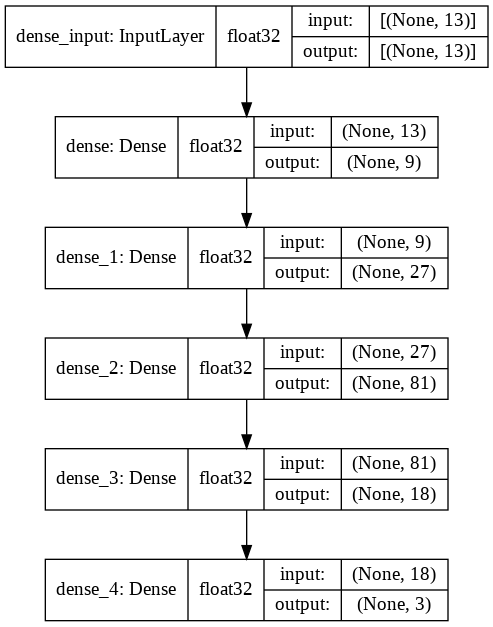

In [ ]:
# Gráficar el modelo

plot_model(wine_model, show_shapes=True, show_dtype=True)

## Entrenar el modelo

Ya que dividimos los datos en conjuntos de entrenamiento y conjuntos de prueba es momento de entrenar.

En el entrenamiento se harán cálculos y cálculos con los datos para producir una modelo matemático que pueda separarlos en las clases existentes.

El entrenamiento se divide en épocas, que son los periodos donde todos los datos son anlizados para producir la salida.

En el entrenamiento nos interesa monitorear las **métricas**, que son los parámetros que nos ayudan a conocer el desempeño del modelo. En los problemas de clasificación, una de las métricas más importantes es la **exactitud (accuracy)**, por lo tanto vamos a monitorear esta métrica.

In [ ]:
# Entrenamiento del modelo

wine_model.fit(Xtrain, ytrain,
               epochs=100,
               batch_size=16,
               validation_data=(Xtest,ytest),
               verbose=1)

Epoch 1/100
8/8 [==============================] - 1s 36ms/step - loss: 1.0907 - accuracy: 0.3306 - val_loss: 1.0627 - val_accuracy: 0.4630
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 1.0674 - accuracy: 0.4758 - val_loss: 1.0404 - val_accuracy: 0.5000
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 1.0473 - accuracy: 0.5000 - val_loss: 1.0132 - val_accuracy: 0.4630
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 1.0229 - accuracy: 0.5484 - val_loss: 0.9830 - val_accuracy: 0.5741
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.9840 - accuracy: 0.6048 - val_loss: 0.9351 - val_accuracy: 0.5926
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 0.9435 - accuracy: 0.6129 - val_loss: 0.8870 - val_accuracy: 0.6111
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.8968 - accuracy: 0.6774 - val_loss: 0.8379 - val_accuracy: 0.7963
Epoch 8/100
8/8 [=========

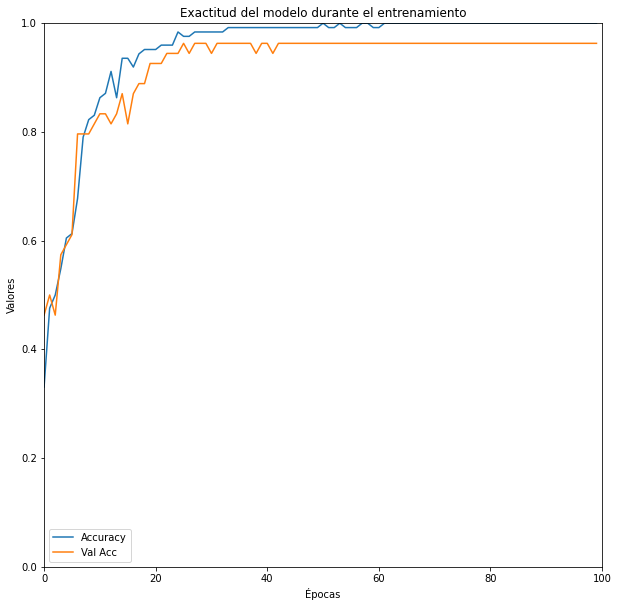

In [ ]:
# Visualizar el comportamiento de la exactitud durante el entrenamiento

plt.figure(figsize=(10,10))
plt.plot(wine_model.history.history['accuracy'],label='Accuracy')
plt.plot(wine_model.history.history['val_accuracy'],label='Val Acc')
plt.title('Exactitud del modelo durante el entrenamiento')
plt.xlabel('Épocas')
plt.xlim(0,100)
plt.ylabel('Valores')
plt.ylim(0,1)
plt.legend()
plt.show()

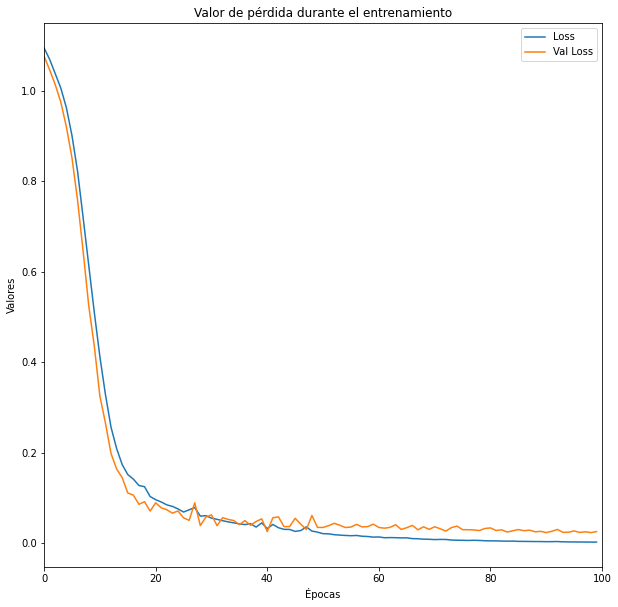

In [ ]:
# Visualizar el comportamiento de la pérdida durante el entrenamiento

plt.figure(figsize=(10,10))
plt.plot(wine_model.history.history['loss'],label='Loss')
plt.plot(wine_model.history.history['val_loss'],label='Val Loss')
plt.title('Valor de pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.xlim(0,100)
plt.ylabel('Valores')
plt.legend()
plt.show()

## Evaluando las métricas

Una vez que entrenamos el modelo, toca hacer las evaluaciones para saber si el modelo es bueno o malo y (más importante aún), qué tan bueno o malo es.

In [ ]:
# Evaluar el modelo respecto a los dos conjuntos de datos

wine_acc_train = wine_model.evaluate(Xtrain, ytrain)
wine_acc_test = wine_model.evaluate(Xtest, ytest)

2/2 [==============================] - 0s 5ms/step - loss: 0.0642 - accuracy: 0.9630


In [ ]:
# Desplegamos los resultados

print('Exactitud en el conjunto de entrenamiento: %.2f' % wine_acc_train[1])
print('Exactitud en el conjunto de prueba: % 2f' % wine_acc_test[1])

Exactitud en el conjunto de entrenamiento: 1.00
Exactitud en el conjunto de prueba:  0.962963


Vemos que durante el entrenamiento el modelo alcanzó un exactitud de 1, es decir, un modelo perfecto.

En el conjunto de prueba, se alcanzó un valor de exactitud de $0.98$ o un 98%. Un resultado bueno.